In [1]:
import pandas as pd
import numpy as np

from datetime import date
from datetime import datetime
import datetime

import matplotlib.pyplot as plt

datos = pd.read_csv('C:/Users/Paula/Desktop/TFG/rtve-observations-episodes-2019-11-01.zip')

In [2]:
datos.head()

,id,date,metric,value,user,referer,os_family,os_version,browser_family,browser_version,...,podcast_permalink,podcast_topic,entries_processed,hostname,city,region,country,location,zip_code,time_zone
0,1a50eda4-26b1-47df-949d-4827665b79e3,2019-11-01T00:56:36.000,Número de descargas de tipo 206,1,6624207285322504776,NaN,Android,6.0.1,Android,6.0.1,...,RADIO-NACIONAL,Informativos,4,NaN,Palencia,Castilla y León,España,"42.0021, -4.5237",34004,Europe/Madrid
1,da19819a-3784-41ef-9ecd-67d6e4be37aa,2019-11-01T01:27:37.000,Número de descargas parciales de tipo 200,1,1093782487219863411,NaN,Android,8.0.0,Android,8.0.0,...,RADIO-NACIONAL,Informativos,21,NaN,Madrid,Madrid,España,"40.4143, -3.7016",28021,Europe/Madrid
2,a60f41aa-6b3d-4fe9-bf9b-6311c57abfc1,2019-11-01T00:49:33.000,Número de descargas de tipo 206,1,-3042089131472286197,RTVE,Windows,7,Chrome,77.0.3865,...,RADIO-CLASICA,Música,7,NaN,San Sebastián Tutla,Oaxaca,México,"17.0645, -96.6705",71242,America/Mexico_City
3,e85a8032-abad-48b4-9bd2-2765a4b730f4,2019-11-01T01:27:12.000,Número de descargas de tipo 206,1,-5995978442346962145,NaN,Android,9,Other,NaN,...,RADIO-NACIONAL,Entretenimiento,15,NaN,La Matanza de Acentejo,Canarias,España,"28.4524, -16.4472",38370,Atlantic/Canary
4,f3dabef8-f024-4f49-a04e-db6bbc1d5e2b,2019-11-01T00:56:50.000,Petición de un posible BOT,1,-233953730499517940,RTVE,Android,7.0,Chrome Mobile,76.0.3809,...,RADIO-3,Música,1,NaN,NaN,NaN,NaN,"90.0000, 0.0000",NaN,NaN


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   date               10000 non-null  object 
 2   metric             10000 non-null  object 
 3   value              10000 non-null  int64  
 4   user               10000 non-null  int64  
 5   referer            5538 non-null   object 
 6   os_family          10000 non-null  object 
 7   os_version         9386 non-null   object 
 8   browser_family     10000 non-null  object 
 9   browser_version    7717 non-null   object 
 10  device_family      10000 non-null  object 
 11  device_brand       7675 non-null   object 
 12  device_model       7674 non-null   object 
 13  episode_file_path  10000 non-null  object 
 14  episode_file_size  10000 non-null  int64  
 15  episode_title      9014 non-null   object 
 16  episode_duration   1000

In [4]:
#Se eliminan las columnas con los datos que no son necesarios.
Datos = datos.drop(['id', 'value', 'os_version', 'browser_version', 'device_brand', 'device_model', 'episode_file_size',  'entries_processed', 'hostname', 'location', 'zip_code'], axis=1)

In [5]:
Datos.head()

,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone
0,2019-11-01T00:56:36.000,Número de descargas de tipo 206,6624207285322504776,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,4674885,24 horas,RADIO-NACIONAL,Informativos,Palencia,Castilla y León,España,Europe/Madrid
1,2019-11-01T01:27:37.000,Número de descargas parciales de tipo 200,1093782487219863411,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,4674885,24 horas,RADIO-NACIONAL,Informativos,Madrid,Madrid,España,Europe/Madrid
2,2019-11-01T00:49:33.000,Número de descargas de tipo 206,-3042089131472286197,RTVE,Windows,Chrome,Dispositivo no registrado,1572524596000.mp3,A través de un espejo - 31/10/19,3513239,A través de un espejo,RADIO-CLASICA,Música,San Sebastián Tutla,Oaxaca,México,America/Mexico_City
3,2019-11-01T01:27:12.000,Número de descargas de tipo 206,-5995978442346962145,NaN,Android,Other,Smartphone,1572175203168.mp3,Encuentros con la vida después de la vida,3201395,Espacio en blanco,RADIO-NACIONAL,Entretenimiento,La Matanza de Acentejo,Canarias,España,Atlantic/Canary
4,2019-11-01T00:56:50.000,Petición de un posible BOT,-233953730499517940,RTVE,Android,Chrome Mobile,Dispositivo no registrado,1571416123127.mp3,Sueño con la tolerancia (1ª parte),3536124,Videodrome,RADIO-3,Música,NaN,NaN,NaN,NaN


In [6]:
Datos.shape

(10000, 17)

In [7]:
#Temática de los podcast
Datos['podcast_topic'].value_counts(dropna=False)

Música                        4426
Magacín                       1473
Informativos                  1139
NaN                            986
Entretenimiento                841
Cultura                        269
Documentales                   268
Servicio público               118
Archivo RNE                    111
Ciencia y Tecnología            99
Informativos territoriales      59
Deportes                        58
Viajes                          48
RNE solo en Podcast             36
Educación                       24
Infantiles                      14
Cine                            13
Recetas                         12
R                                3
Series                           2
20 aniversario de Radio 5        1
Name: podcast_topic, dtype: int64

In [8]:
Datos['metric'].value_counts(dropna=False)

Número de descargas de tipo 206              3841
Petición de tipo HEAD                        3216
Número de descargas parciales de tipo 206    1262
Número de descargas parciales de tipo 200    1103
Petición no 200 o 206                         340
Número de descargas de tipo 200               204
Petición de un posible BOT                     17
Petición de un recurso no MP3                  17
Name: metric, dtype: int64

In [9]:
#Se eliminan los datos que no sean de tipo 206, 200 o descargas parciales.No son interesantes para el análisis.
Datos = Datos[Datos.metric.isin(['Número de descargas de tipo 206', 'Número de descargas parciales de tipo 206', 'Número de descargas parciales de tipo 200','Número de descargas de tipo 200' ])]

In [10]:
Datos.metric

0                 Número de descargas de tipo 206
1       Número de descargas parciales de tipo 200
2                 Número de descargas de tipo 206
3                 Número de descargas de tipo 206
5       Número de descargas parciales de tipo 206
                          ...                    
9994              Número de descargas de tipo 206
9995    Número de descargas parciales de tipo 206
9997    Número de descargas parciales de tipo 200
9998              Número de descargas de tipo 206
9999              Número de descargas de tipo 206
Name: metric, Length: 6410, dtype: object

In [11]:
Datos['metric'].value_counts(dropna=False)

Número de descargas de tipo 206              3841
Número de descargas parciales de tipo 206    1262
Número de descargas parciales de tipo 200    1103
Número de descargas de tipo 200               204
Name: metric, dtype: int64

In [12]:
Datos.head(2)

,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone
0,2019-11-01T00:56:36.000,Número de descargas de tipo 206,6624207285322504776,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,4674885,24 horas,RADIO-NACIONAL,Informativos,Palencia,Castilla y León,España,Europe/Madrid
1,2019-11-01T01:27:37.000,Número de descargas parciales de tipo 200,1093782487219863411,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,4674885,24 horas,RADIO-NACIONAL,Informativos,Madrid,Madrid,España,Europe/Madrid


In [13]:
Datos['user'].value_counts(dropna=False)

-4651496039380642881    12
 496082641842722391     10
 6069712137940548831     8
-375875986833972032      6
 3413815924711635741     6
                        ..
 8644027351722851357     1
 2057006852284194053     1
 4371379861329096179     1
 2243197504190468777     1
 5733484840755179275     1
Name: user, Length: 5390, dtype: int64

In [14]:
Datos['podcast_permalink'].value_counts(dropna=False)

RADIO-NACIONAL    2421
RADIO-3           2177
RADIO-CLASICA      809
NaN                610
RADIO-5            271
RADIO-EXTERIOR     100
RADIO-4             21
LA1                  1
Name: podcast_permalink, dtype: int64

In [15]:
Datos['podcast_title'].value_counts(dropna=False)

NaN                                      610
Las mañanas de RNE con Pepa Fernández    533
Espacio en blanco                        527
Las mañanas de RNE con Íñigo Alfonso     243
Hoy empieza todo con Ángel Carmona       210
                                        ... 
Los clásicos                               1
Maestros cantores                          1
Todo a cappella                            1
Respuestas de la Ciencia                   1
El flamenco en R5                          1
Name: podcast_title, Length: 367, dtype: int64

In [16]:
#Se eliminan los datos cuya duración del episodio es 0.
Datos= Datos[Datos.episode_duration!=0]

In [17]:
Datos['podcast_title'].value_counts(dropna=False)

Las mañanas de RNE con Pepa Fernández    533
Espacio en blanco                        526
Las mañanas de RNE con Íñigo Alfonso     243
Hoy empieza todo con Ángel Carmona       210
180 grados                               206
                                        ... 
Canciones recomendadas                     1
De cine                                    1
Sangre sobre la tierra                     1
Tablero deportivo                          1
Mamás y papás                              1
Name: podcast_title, Length: 366, dtype: int64

In [18]:
Datos[Datos.user == -4651496039380642881]

,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone
2642,2019-11-01T14:39:26.000,Número de descargas parciales de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1571740911874.mp3,"Cicloturismo, ocio y deporte para disfrutar en...",1553018,En clave Turismo,RADIO-EXTERIOR,Viajes,Alcorcón,Madrid,España,Europe/Madrid
2644,2019-11-01T14:07:39.000,Número de descargas de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1572259011860.mp3,"¿""vertir"" o ""verter""?",320287,El español urgente con Fundéu,RADIO-5,Cultura,Alcorcón,Madrid,España,Europe/Madrid
2845,2019-11-01T14:46:07.000,Número de descargas parciales de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1568585517517.mp3,Edurne Pasaban,1805150,La observadora,RADIO-NACIONAL,Entretenimiento,Alcorcón,Madrid,España,Europe/Madrid
7461,2019-11-01T08:49:26.000,Número de descargas de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1544616479193.mp3,Empresa española desarrolla con éxito el jugue...,1779794,A golpe de bit,RADIO-EXTERIOR,Ciencia y Tecnología,Alcorcón,Madrid,España,Europe/Madrid
7504,2019-11-01T08:50:26.000,Número de descargas de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1542627318580.mp3,Octava edición de Big Data,1810931,A golpe de bit,RADIO-EXTERIOR,Ciencia y Tecnología,Alcorcón,Madrid,España,Europe/Madrid
7528,2019-11-01T09:07:40.000,Número de descargas parciales de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1559041754785.mp3,¿Cómo deberíamos prepararnos para la robotizac...,1805883,A golpe de bit,RADIO-EXTERIOR,Ciencia y Tecnología,Alcorcón,Madrid,España,Europe/Madrid
7585,2019-11-01T08:51:20.000,Número de descargas parciales de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1541071703720.mp3,Encuesta de percepción social de la innovación...,1805889,A golpe de bit,RADIO-EXTERIOR,Ciencia y Tecnología,Alcorcón,Madrid,España,Europe/Madrid
7887,2019-11-01T09:15:16.000,Número de descargas parciales de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1572546538547.mp3,Las mejores ciudades del mundo para ser niño,1686765,Por tres razones,RADIO-NACIONAL,Informativos,Alcorcón,Madrid,España,Europe/Madrid
8243,2019-11-01T11:12:18.000,Número de descargas de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1537379824544.mp3,¿Padres sin estudios igual a hijos sin estudios?,1616162,Por tres razones,RADIO-NACIONAL,Informativos,Alcorcón,Madrid,España,Europe/Madrid
8633,2019-11-01T11:27:02.000,Número de descargas de tipo 206,-4651496039380642881,RTVE,Mac OS X,Safari,PC,1571509616605.mp3,El festival sobre progreso sostenibile de Mad...,1536383,Artesfera en Radio 5,RADIO-5,Cultura,Alcorcón,Madrid,España,Europe/Madrid


In [19]:
#Se ordena los datos de la matriz por tiempo.
Datos.sort_values(by='date')

,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone
5563,2019-11-01T00:00:03.000,Número de descargas de tipo 206,-154842013995607494,NaN,Android,Android,Smartphone,1572441943897.mp3,Un poco de Tete Montoliú es mucho (II),3508119,Sólo jazz,RADIO-CLASICA,Música,Ciudad de México,Ciudad de México,México,America/Mexico_City
5051,2019-11-01T00:00:03.000,Número de descargas de tipo 206,5593889098322614847,NaN,Android,Android,Smartphone,1572540292889.mp3,"MILES DAVIS: John Scofield, Mike Stern y Marcu...",3534294,Saltamontes,RADIO-3,Música,Vigo,Galicia,España,Europe/Madrid
5336,2019-11-01T00:00:12.000,Número de descargas parciales de tipo 206,4543763321232610746,NaN,iOS,Mobile Safari UI/WKWebView,Tableta,1572556860944.mp3,BOLETIN RNE - 31.10.19 22-00H,671869,Boletines RNE,RADIO-NACIONAL,Informativos,Hamburgo,Hamburgo,Alemania,Europe/Berlin
5285,2019-11-01T00:00:31.000,Número de descargas de tipo 206,-1854272914882180369,NaN,Android,Android,Smartphone,1330153817957.mp3,Primera hora - 25/02/12,3191484,Espacio en blanco,RADIO-NACIONAL,Entretenimiento,Barcelona,Cataluña,España,Europe/Madrid
4943,2019-11-01T00:00:35.000,Número de descargas de tipo 206,2386459881588943663,NaN,Android,Android,Smartphone,1572175203168.mp3,Encuentros con la vida después de la vida,3201395,Espacio en blanco,RADIO-NACIONAL,Entretenimiento,Santiago de Compostela,Galicia,España,Europe/Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,2019-11-01T22:53:14.000,Número de descargas de tipo 206,5058059644454795140,NaN,iOS,Mobile Safari UI/WKWebView,Smartphone,1571568600931.mp3,Carne roja - Julio Basulto - 'Vida sana',1812231,No es un día cualquiera,RADIO-NACIONAL,Magacín,Yecla,Murcia,España,Europe/Madrid
5306,2019-11-01T23:23:42.000,Número de descargas de tipo 206,-887851500365532202,NaN,iOS,Mobile Safari UI/WKWebView,Smartphone,1572225828811.mp3,En un mundo feliz - 28/10/19,3575489,En un mundo feliz,RADIO-3,Música,NaN,Texas,Estados Unidos,America/Chicago
4898,2019-11-01T23:29:43.000,Número de descargas parciales de tipo 206,694720002446329070,RTVE,Windows,Edge,Dispositivo no registrado,1572470027619.mp3,MOZART: Gran Partita,1663587,Gran Repertorio,RADIO-CLASICA,Música,Torreón,Chiapas,México,America/Mexico_City
4889,2019-11-01T23:30:30.000,Número de descargas de tipo 206,-6906471476793900228,RTVE,Windows,Chrome,Dispositivo no registrado,1491063013540.mp3,"Triángulos, desde las estrellas a Pitágoras",1174237,Raíz de 5,RADIO-5,Educación,Oviedo,Asturias,España,Europe/Madrid


In [20]:
Datos['hora'] = Datos.apply(lambda row: datetime.datetime.strptime(row.date, "%Y-%m-%dT%H:%M:%S.%f").hour , axis = 1)
Datos['minutos'] = Datos.apply(lambda row: datetime.datetime.strptime(row.date, "%Y-%m-%dT%H:%M:%S.%f").minute , axis = 1)

In [21]:
Datos.head(2)


,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone,hora,minutos
0,2019-11-01T00:56:36.000,Número de descargas de tipo 206,6624207285322504776,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,4674885,24 horas,RADIO-NACIONAL,Informativos,Palencia,Castilla y León,España,Europe/Madrid,0,56
1,2019-11-01T01:27:37.000,Número de descargas parciales de tipo 200,1093782487219863411,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,4674885,24 horas,RADIO-NACIONAL,Informativos,Madrid,Madrid,España,Europe/Madrid,1,27


Clasificación de los datos por franja horaria.

    Mañana 6:00 a 10:00.
    Media-mañana 10 a 15:00.
    Tarde 15:00 a 21:00.
    Noche 21:00 a 6:00 del día siguiente.
    


In [22]:
Datos_time = Datos[['date', 'hora', 'minutos']]
Datos_time = Datos_time.sort_values(by='date')

In [23]:
#Nueva matriz que indique en una nueva columna a que franja horaria pertenece cada dato. 
Datos_time['franja_horaria']= Datos_time['hora'].apply(lambda x:'mañana' if (7 <= x < 10 )  else ('media-mañana' if (10 <= x < 15) else ('tarde' if (15 <= x < 21 )  else 'noche')))

In [24]:
Datos_time.head()

,date,hora,minutos,franja_horaria
5563,2019-11-01T00:00:03.000,0,0,noche
5051,2019-11-01T00:00:03.000,0,0,noche
5336,2019-11-01T00:00:12.000,0,0,noche
5285,2019-11-01T00:00:31.000,0,0,noche
4943,2019-11-01T00:00:35.000,0,0,noche


In [25]:
Datos_time[Datos_time.franja_horaria=='noche']

,date,hora,minutos,franja_horaria
5563,2019-11-01T00:00:03.000,0,0,noche
5051,2019-11-01T00:00:03.000,0,0,noche
5336,2019-11-01T00:00:12.000,0,0,noche
5285,2019-11-01T00:00:31.000,0,0,noche
4943,2019-11-01T00:00:35.000,0,0,noche
...,...,...,...,...
4882,2019-11-01T22:53:14.000,22,53,noche
5306,2019-11-01T23:23:42.000,23,23,noche
4898,2019-11-01T23:29:43.000,23,29,noche
4889,2019-11-01T23:30:30.000,23,30,noche


In [26]:
#Número de registros para cada franja horaria
Datos_time['franja_horaria'].value_counts()

media-mañana    2433
noche           1459
mañana          1133
tarde            784
Name: franja_horaria, dtype: int64

In [27]:
Datos_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5809 entries, 5563 to 4870
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            5809 non-null   object
 1   hora            5809 non-null   int64 
 2   minutos         5809 non-null   int64 
 3   franja_horaria  5809 non-null   object
dtypes: int64(2), object(2)
memory usage: 226.9+ KB


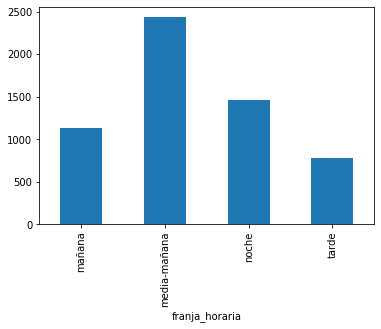

In [28]:
Datos_time.groupby('franja_horaria')['franja_horaria'].count().plot(kind='bar')

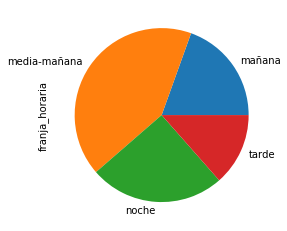

In [29]:
Datos_time.groupby('franja_horaria')['franja_horaria'].count().plot(kind='pie')

Función para filtrar los datos por duración.


Primero se clasifican los datos por duración. Están en milisegundos.
Se pasan los datos a segundos.

In [30]:
Datos['episode_duration']= Datos['episode_duration'].apply (lambda x: x/(60000))

In [31]:
Datos['episode_duration'].value_counts()

53.764533     149
118.894250    117
55.581783      97
53.356583      81
77.914750      75
             ... 
2.488717        1
118.980867      1
59.052917       1
59.097333       1
20.250000       1
Name: episode_duration, Length: 1921, dtype: int64

In [32]:
Datos.head(2)

,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone,hora,minutos
0,2019-11-01T00:56:36.000,Número de descargas de tipo 206,6624207285322504776,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,77.91475,24 horas,RADIO-NACIONAL,Informativos,Palencia,Castilla y León,España,Europe/Madrid,0,56
1,2019-11-01T01:27:37.000,Número de descargas parciales de tipo 200,1093782487219863411,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,77.91475,24 horas,RADIO-NACIONAL,Informativos,Madrid,Madrid,España,Europe/Madrid,1,27


**Función que devuelva los datos según duración del episodio en minutos.**


Distinguimos varios tipos de podcasts:

    <30 mins.
    30-60 mins.
    >60 mins.

In [33]:
#Se añade una columna que clasifique los datos por duración:
Datos['clasificación_dur_ep']= Datos['episode_duration'].apply (lambda x: '<30 mins' if x<30 else('30-60 mins' if 30<=x<60 else '>60 mins'))

In [34]:
Datos[['episode_duration','clasificación_dur_ep']].head()

,episode_duration,clasificación_dur_ep
0,77.914750,>60 mins
1,77.914750,>60 mins
2,58.553983,30-60 mins
3,53.356583,30-60 mins
5,53.786733,30-60 mins


In [35]:
Datos[['episode_duration','clasificación_dur_ep']]

,episode_duration,clasificación_dur_ep
0,77.914750,>60 mins
1,77.914750,>60 mins
2,58.553983,30-60 mins
3,53.356583,30-60 mins
5,53.786733,30-60 mins
...,...,...
9993,60.953383,>60 mins
9994,60.093617,>60 mins
9995,51.689533,30-60 mins
9997,52.905100,30-60 mins


In [36]:
#Función que devuelve podcasts dentro de un rango de duración parecida.

def filtro_duración (minutos):
    
     if minutos >= 60 :
        largo = Datos[Datos.clasificación_dur_ep=='>60 mins']
        largo = largo[['episode_duration','clasificación_dur_ep', 'episode_title', 'podcast_permalink', 'podcast_topic']]

        return largo.head()

    
  
     elif 30 <= minutos < 60 : 
          medio = Datos[Datos.clasificación_dur_ep=='30-60 mins']
          medio = medio[['episode_duration','clasificación_dur_ep', 'episode_title', 'podcast_permalink', 'podcast_topic']]
        
          return medio.head()
    
     else:
        if minutos < 30 :
            corto = Datos[Datos.clasificación_dur_ep=='<30 mins']
            corto = corto[['episode_duration','clasificación_dur_ep', 'episode_title', 'podcast_permalink', 'podcast_topic']]
        
        return corto.head()

In [37]:
filtro_duración (35)

,episode_duration,clasificación_dur_ep,episode_title,podcast_permalink,podcast_topic
2,58.553983,30-60 mins,A través de un espejo - 31/10/19,RADIO-CLASICA,Música
3,53.356583,30-60 mins,Encuentros con la vida después de la vida,RADIO-NACIONAL,Entretenimiento
5,53.786733,30-60 mins,El pueblo de los avistamientos,RADIO-NACIONAL,Entretenimiento
6,59.141750,30-60 mins,Música de Stevie Wonder,RADIO-3,Música
14,58.916267,30-60 mins,... Y 27 años de sintonías propias,RADIO-3,Música


In [38]:
filtro_duración (20)

,episode_duration,clasificación_dur_ep,episode_title,podcast_permalink,podcast_topic
13,7.409617,<30 mins,Los partidos comienzan la campaña de cara al 10N,RADIO-NACIONAL,Informativos
18,17.902583,<30 mins,Gente despierta - Matemáticas aterradoras.,RADIO-NACIONAL,Magacín
36,2.965767,<30 mins,Así se dirigen los partidos a sus votantes,RADIO-NACIONAL,Informativos
46,5.187033,<30 mins,BOLETIN RNE - 01.11.19 - 01.00 H,RADIO-NACIONAL,Informativos
58,3.647550,<30 mins,Noche de las ánimas,RADIO-5,Cultura


_Gráfico sobre la duración de los podcast._

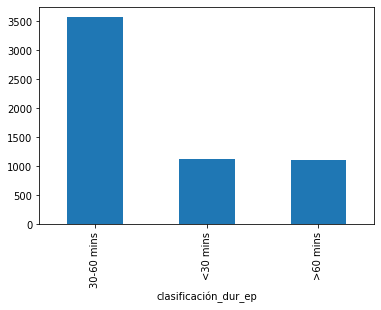

In [39]:
Datos.groupby('clasificación_dur_ep')['clasificación_dur_ep'].count().plot(kind='bar')

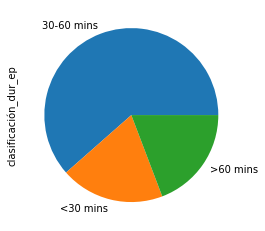

In [40]:
Datos.groupby('clasificación_dur_ep')['clasificación_dur_ep'].count().plot(kind='pie')

**Estadísticas sobre el tema de los podcast recogidos en los datos.**

In [41]:
#Recapitulando, los distintos podcast_topic son:
Datos['podcast_topic'].value_counts(dropna=False)

Música                        3021
Magacín                        902
Informativos                   661
Entretenimiento                568
Documentales                   177
Cultura                        146
Ciencia y Tecnología            71
Archivo RNE                     58
Servicio público                46
Informativos territoriales      37
Deportes                        34
Viajes                          30
RNE solo en Podcast             21
Educación                       11
Cine                             9
Infantiles                       9
Recetas                          5
20 aniversario de Radio 5        1
Series                           1
R                                1
Name: podcast_topic, dtype: int64

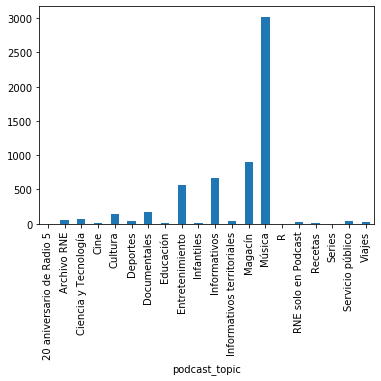

In [42]:
#Representación de los podcast por temática en un gráfico.
Datos.groupby('podcast_topic')['podcast_topic'].count().plot(kind='bar')

Gráfico comparativo entre los topics y las horas en las que se escuchan.

In [43]:
Datos.head(1)

,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone,hora,minutos,clasificación_dur_ep
0,2019-11-01T00:56:36.000,Número de descargas de tipo 206,6624207285322504776,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,77.91475,24 horas,RADIO-NACIONAL,Informativos,Palencia,Castilla y León,España,Europe/Madrid,0,56,>60 mins


In [44]:
#Para el gráfico, eliminamos los datos NaN
#Creamos una nueva tabla con los datos que tenemos

Reprod_podcast = Datos[['podcast_topic', 'hora']]



In [45]:
Reprod_podcast.head()

,podcast_topic,hora
0,Informativos,0
1,Informativos,1
2,Música,0
3,Entretenimiento,1
5,Entretenimiento,0


In [46]:
Reprod_podcast

,podcast_topic,hora
0,Informativos,0
1,Informativos,1
2,Música,0
3,Entretenimiento,1
5,Entretenimiento,0
...,...,...
9993,Música,14
9994,Música,14
9995,Magacín,14
9997,Magacín,14


In [47]:
Reprod_podcast.groupby('podcast_topic').count()

,hora
podcast_topic,
20 aniversario de Radio 5,1
Archivo RNE,58
Ciencia y Tecnología,71
Cine,9
Cultura,146
Deportes,34
Documentales,177
Educación,11
Entretenimiento,568


In [48]:
def podcast_horas (topic):
    

    podcast_horas= Reprod_podcast[Reprod_podcast.podcast_topic.isin([topic])]
    
    return podcast_horas.groupby('hora').count()

In [49]:
podcast_horas('Música')

,podcast_topic
hora,
0,205
1,84
2,12
3,14
4,4
5,23
6,28
7,103
8,245


In [50]:
lista=['Música', 'Magacín', 'Informativos', 'Entretenimiento', 'Cultura', 'Documentales']

Horas_topic= Reprod_podcast.groupby('hora').count()

for k in lista:
    
    Horas_topic[k]= Reprod_podcast[Reprod_podcast.podcast_topic==k].groupby('hora').count()
   
   
print(Horas_topic)

      podcast_topic  Música  Magacín  Informativos  Entretenimiento  Cultura  \
hora                                                                           
0               689     205     82.0         105.0            194.0     19.0   
1               322      84     34.0          52.0            101.0     12.0   
2                77      12      6.0          15.0             26.0      2.0   
3                69      14     12.0          10.0             23.0      2.0   
4                 6       4      NaN           NaN              1.0      NaN   
5               106      23     26.0          23.0             17.0      3.0   
6                77      28     17.0          13.0              6.0      1.0   
7               257     103     67.0          39.0             15.0      6.0   
8               419     245     72.0          40.0             19.0      7.0   
9               457     278     52.0          62.0             23.0      5.0   
10              380     246     49.0    

In [51]:
Horas_topic.head()

,podcast_topic,Música,Magacín,Informativos,Entretenimiento,Cultura,Documentales
hora,,,,,,,
0,689,205,82.0,105.0,194.0,19.0,44.0
1,322,84,34.0,52.0,101.0,12.0,15.0
2,77,12,6.0,15.0,26.0,2.0,9.0
3,69,14,12.0,10.0,23.0,2.0,4.0
4,6,4,NaN,NaN,1.0,NaN,NaN


In [52]:
Horas_topic.columns

Index(['podcast_topic', 'Música', 'Magacín', 'Informativos', 'Entretenimiento',
       'Cultura', 'Documentales'],
      dtype='object')

In [53]:
Horas_topic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   podcast_topic    24 non-null     int64  
 1   Música           24 non-null     int64  
 2   Magacín          22 non-null     float64
 3   Informativos     21 non-null     float64
 4   Entretenimiento  22 non-null     float64
 5   Cultura          21 non-null     float64
 6   Documentales     21 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.5 KB


In [54]:
#Cambiamos las columnas de tipo float a tipo int y sustituimos los datos NaN por 0
#Eliminamos la columna podcast_topic

Horas_topic= Horas_topic.fillna(0).astype(np.int64).drop(['podcast_topic'], axis=1)

In [55]:
Horas_topic.head()

,Música,Magacín,Informativos,Entretenimiento,Cultura,Documentales
hora,,,,,,
0,205,82,105,194,19,44
1,84,34,52,101,12,15
2,12,6,15,26,2,9
3,14,12,10,23,2,4
4,4,0,0,1,0,0


In [56]:
Horas_topic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Música           24 non-null     int64
 1   Magacín          24 non-null     int64
 2   Informativos     24 non-null     int64
 3   Entretenimiento  24 non-null     int64
 4   Cultura          24 non-null     int64
 5   Documentales     24 non-null     int64
dtypes: int64(6)
memory usage: 1.3 KB


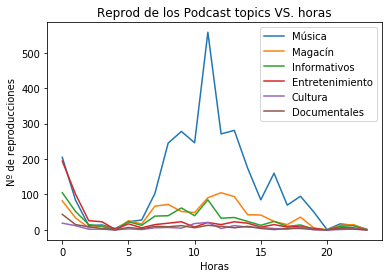

In [57]:
plt.plot( Horas_topic.index, Horas_topic.Música, label='Música')
plt.plot( Horas_topic.index, Horas_topic.Magacín, label='Magacín')
plt.plot( Horas_topic.index, Horas_topic.Informativos, label='Informativos')
plt.plot( Horas_topic.index, Horas_topic.Entretenimiento, label='Entretenimiento')
plt.plot( Horas_topic.index, Horas_topic.Cultura, label='Cultura')
plt.plot( Horas_topic.index, Horas_topic.Documentales, label='Documentales')

plt.title('Reprod de los Podcast topics VS. horas')
plt.xlabel('Horas')
plt.ylabel('Nº de reproducciones')


plt.legend(loc='upper right')

In [58]:
Datos[Datos.podcast_topic=='Magacín']['podcast_title'].value_counts(dropna=False)

Las mañanas de RNE con Pepa Fernández             533
No es un día cualquiera                           102
Gente despierta                                    96
Solamente una vez                                  58
El gallo que no cesa                               37
Esto me suena. Las tardes del Ciudadano García     13
La noche en vela                                   12
De boca a orella a Ràdio 4                          8
Punto de enlace                                     7
Emisión en sefardí                                  5
América hoy                                         4
Emisión en árabe                                    4
English Language Broadcast                          3
El canto del grillo                                 2
Venga la radio                                      2
He venido aquí a hablar de lo mío                   2
#estoqueestamoshaciendonotienenombre                2
Abierto hasta las 2                                 2
Emissão em Português        

**Estadísticas sobre los podcasts por zonas geográficas**

Primero vemos que países registran datos:

In [59]:
Datos['country'].value_counts(dropna=False)


España            4851
Reino Unido        118
Estados Unidos     105
Alemania            77
Francia             72
                  ... 
Croacia              1
Mali                 1
Jordania             1
Argelia              1
Islandia             1
Name: country, Length: 78, dtype: int64

In [60]:
#Por debajo del límite eliminamos los valores.
threshold = Datos['country'].value_counts().quantile(0.95)
country_counts = Datos['country'].value_counts() 
to_remove = country_counts[country_counts <= threshold].index
cc= country_counts.drop(to_remove)

In [61]:
country_counts[country_counts <= threshold].index


Index(['Francia', 'Italia', 'Argentina', 'México', 'Suiza', 'Chile', 'Bélgica',
       'Japón', 'Portugal', 'Irlanda', 'Colombia', 'Brasil', 'Polonia',
       'Suecia', 'India', 'Perú', 'China', 'Canadá', 'Austria', 'Australia',
       'Uruguay', 'Holanda', 'Ecuador', 'Corea del Sur', 'Guatemala',
       'Costa Rica', 'Noruega', 'Marruecos', 'República Checa',
       'República Dominicana', 'Hong Kong', 'Dinamarca', 'Venezuela', 'Rusia',
       'Bulgaria', 'Andorra', 'Sudáfrica', 'Hungría', 'Mauritania', 'Singapur',
       'Honduras', 'Vietnam', 'Turquía', 'Finlandia', 'Serbia', 'Tailandia',
       'San Bartolomé', 'Líbano', 'Eslovaquia', 'Bolivia', 'Malasia',
       'El Salvador', 'Luxemburgo', 'Lituania', 'Grecia', 'Níger', 'Reunión',
       'Bahréin', 'Argelia', 'Guinea Ecuatorial', 'Croacia', 'Mali',
       'Islandia', 'Territorios Palestinos', 'Jordania', 'Nueva Zelanda',
       'Malta', 'Rumanía', 'Egipto', 'Timor Oriental', 'Filipinas', 'Panamá',
       'Emiratos Árabes Unidos']

In [62]:
cc

España            4851
Reino Unido        118
Estados Unidos     105
Alemania            77
Name: country, dtype: int64

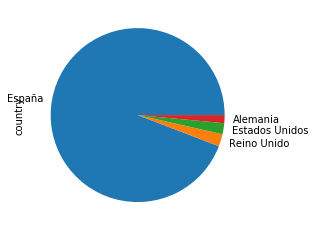

In [63]:
cc.plot(kind='pie')

Para los datos de España, vamos a ver las zonas en las que más reproducciones hay:

In [64]:
Datos['region'][Datos.country=='España'].value_counts(dropna=False)


Madrid                1326
Andalucía              671
Cataluña               584
Valencia               483
NaN                    278
Castilla y León        258
Galicia                208
País Vasco             198
Castilla-La Mancha     140
Canarias               139
Aragón                 126
Murcia                  93
Asturias                89
Extremadura             66
Baleares                62
Navarra                 61
La Rioja                36
Cantabria               24
Melilla                  5
Ceuta                    4
Name: region, dtype: int64

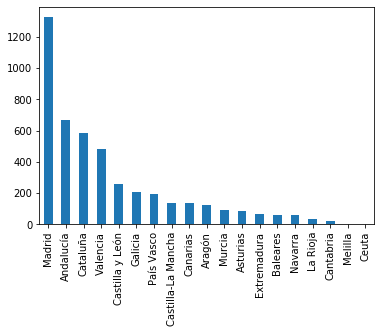

In [65]:
Datos['region'][Datos.country=='España'].value_counts(dropna=True).plot(kind='bar')

Para los datos de la comunidad de Madrid, creamos una tabla que recoja el tema de los podcast y el permalink de los mismos:

In [66]:
Temas_Madrid= Datos[['date', 'podcast_title', 'podcast_permalink', 'podcast_topic']][Datos.region=='Madrid']

In [67]:
Temas_Madrid

,date,podcast_title,podcast_permalink,podcast_topic
1,2019-11-01T01:27:37.000,24 horas,RADIO-NACIONAL,Informativos
5,2019-11-01T00:56:25.000,Espacio en blanco,RADIO-NACIONAL,Entretenimiento
6,2019-11-01T00:49:25.000,Cuando los elefantes sueñan con la música,RADIO-3,Música
17,2019-11-01T00:57:33.000,Espacio en blanco,RADIO-NACIONAL,Entretenimiento
18,2019-11-01T00:50:39.000,Gente despierta,RADIO-NACIONAL,Magacín
...,...,...,...,...
9953,2019-11-01T14:00:07.000,Sinfonía de la mañana,RADIO-CLASICA,Música
9958,2019-11-01T14:00:25.000,No es un día cualquiera,RADIO-NACIONAL,Magacín
9967,2019-11-01T14:00:28.000,Espacio en blanco,RADIO-NACIONAL,Entretenimiento
9983,2019-11-01T14:00:58.000,Documentos RNE,RADIO-NACIONAL,Documentales


Los topics más escuchados en Madrid son:

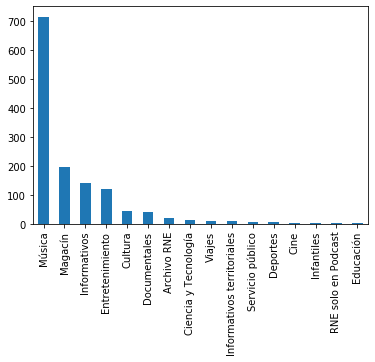

In [68]:
Temas_Madrid['podcast_topic'].value_counts(dropna=True).plot(kind='bar')

Creamos una función para que devuelva los topics más escuchados en función de la región introducida:

In [69]:
def topic_región (region):
    Datos[Datos.region==region]['podcast_topic'].value_counts(dropna=True).plot(kind='bar')


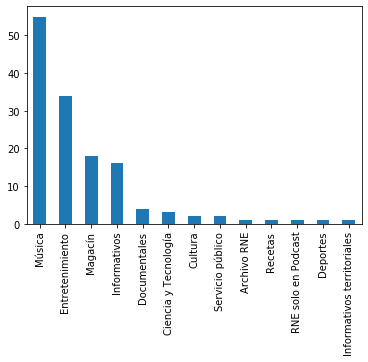

In [70]:
topic_región('Canarias')

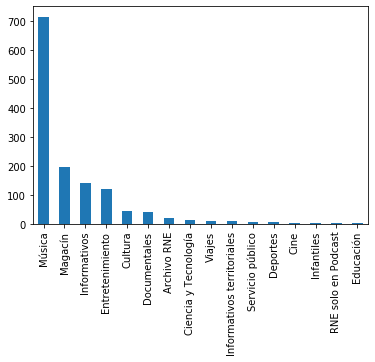

In [71]:
topic_región('Madrid')

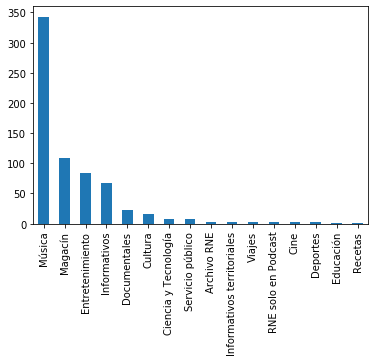

In [72]:
topic_región('Andalucía')

In [73]:
Datos.head(2)

,date,metric,user,referer,os_family,browser_family,device_family,episode_file_path,episode_title,episode_duration,podcast_title,podcast_permalink,podcast_topic,city,region,country,time_zone,hora,minutos,clasificación_dur_ep
0,2019-11-01T00:56:36.000,Número de descargas de tipo 206,6624207285322504776,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,77.91475,24 horas,RADIO-NACIONAL,Informativos,Palencia,Castilla y León,España,Europe/Madrid,0,56,>60 mins
1,2019-11-01T01:27:37.000,Número de descargas parciales de tipo 200,1093782487219863411,NaN,Android,Android,Smartphone,1572564777864.mp3,Análisis de la información - 31/10/19,77.91475,24 horas,RADIO-NACIONAL,Informativos,Madrid,Madrid,España,Europe/Madrid,1,27,>60 mins


In [74]:
Datos['os_family'].value_counts(dropna=False)

Android          2880
iOS              1349
Windows          1185
Mac OS X          259
Resto             128
No registrado       8
Name: os_family, dtype: int64

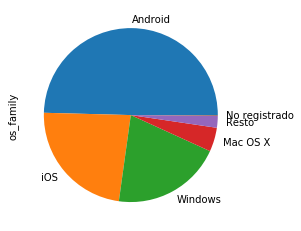

In [75]:
Datos['os_family'].value_counts(dropna=False).plot(kind='pie')

In [76]:
Datos['device_family'].value_counts(dropna=False)

Smartphone                   3580
Dispositivo no registrado    1559
Tableta                       325
PC                            260
Smart TV                       85
Name: device_family, dtype: int64

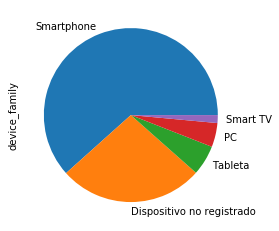

In [77]:
Datos['device_family'].value_counts(dropna=False).plot(kind='pie')

In [78]:
Datos['podcast_title'].value_counts(dropna=False)

Las mañanas de RNE con Pepa Fernández    533
Espacio en blanco                        526
Las mañanas de RNE con Íñigo Alfonso     243
Hoy empieza todo con Ángel Carmona       210
180 grados                               206
                                        ... 
Canciones recomendadas                     1
De cine                                    1
Sangre sobre la tierra                     1
Tablero deportivo                          1
Mamás y papás                              1
Name: podcast_title, Length: 366, dtype: int64

**Sistemas de recomendación**

Empezando por un sistema de recomendación básico:
    
    Gráfico con los programas con más reproducciones.

In [79]:
Datos['podcast_title'].value_counts(dropna=True)

Las mañanas de RNE con Pepa Fernández                        533
Espacio en blanco                                            526
Las mañanas de RNE con Íñigo Alfonso                         243
Hoy empieza todo con Ángel Carmona                           210
180 grados                                                   206
                                                            ... 
Siluetas                                                       1
Aún no me he repuesto de la última noche que pasé contigo      1
Un món d'ombres                                                1
Mamás y papás                                                  1
Consumo gusto                                                  1
Name: podcast_title, Length: 365, dtype: int64

Los 10 programas más escuchados son:

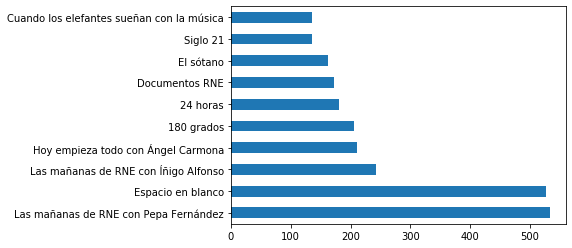

In [80]:
Datos['podcast_title'].value_counts(dropna=True).head(10).plot(kind='barh')

Vemos los tipos de datos que hemos obtenido según el parámetro metric:

In [81]:
Datos['metric'].value_counts(dropna=False)

Número de descargas de tipo 206              3494
Número de descargas parciales de tipo 206    1153
Número de descargas parciales de tipo 200     965
Número de descargas de tipo 200               197
Name: metric, dtype: int64

Otra forma sencilla de recomendar es por zonas geográficas, dado un topic concreto:

In [82]:
def recomendador_zona_topic (region, tema):
    Datos[(Datos.region==region) & (Datos.podcast_topic==tema)]['podcast_title'].value_counts(dropna=True).plot(kind='bar')
    


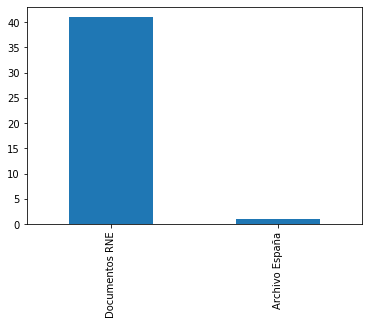

In [83]:
recomendador_zona_topic ('Madrid', 'Documentales')

In [84]:
Datos['clasificación_dur_ep'].value_counts(dropna=False)

30-60 mins    3572
<30 mins      1121
>60 mins      1116
Name: clasificación_dur_ep, dtype: int64

Si además quisiéramos añadir el filtro del tiempo de duración de los episodios:

In [85]:
def recomendador_zona_topic_tiempo (region, tema, tiempo):
   
    
     if tiempo >= 60 :
        return Datos[(Datos.region==region) & (Datos.podcast_topic==tema) & (Datos.clasificación_dur_ep=='>60 mins') ]['podcast_title'].value_counts(dropna=True)

     elif 30 <= tiempo < 60 :
        return Datos[(Datos.region==region) & (Datos.podcast_topic==tema) & (Datos.clasificación_dur_ep=='30-60 mins') ]['podcast_title'].value_counts(dropna=True)
  
      
    
     else:
        if tiempo < 30 :
            return Datos[(Datos.region==region) & (Datos.podcast_topic==tema) & (Datos.clasificación_dur_ep=='<30 mins') ]['podcast_title'].value_counts(dropna=True)
           
    

In [86]:
recomendador_zona_topic_tiempo ('Madrid', 'Entretenimiento', 50)

Espacio en blanco          112
La observadora               2
La víspera del infinito      1
Radiogramas                  1
Name: podcast_title, dtype: int64

In [87]:
recomendador_zona_topic_tiempo ('Andalucía', 'Magacín', 22)

Las mañanas de RNE con Pepa Fernández    27
Solamente una vez                         5
El gallo que no cesa                      4
Gente despierta                           3
No es un día cualquiera                   3
Canarias Mediodía - RNE                   1
Name: podcast_title, dtype: int64

In [88]:
Datos[(Datos.podcast_title=='Hoy empieza todo con Ángel Carmona')]['episode_title'].value_counts(dropna=True)

Desde el Metro de Madrid                                                                         117
Festivo musical                                                                                   36
'Blasphemous', 'Europa soy yo' y Bandeja de Entrada                                               14
Desafío DJ y el regreso de Carlangas                                                              10
Desafío DJ: Vetusta Morla vs. Delaporte                                                            5
Pixies y Messura                                                                                   3
'Érase una vez'... Depedro                                                                         2
Rugby y Nunatak                                                                                    2
¡Que le den a la ciencia!                                                                          2
Colectivo Da Silva, Rocío Vidal y lo nuevo de Fuel Fandango                                

In [89]:
Datos[(Datos.podcast_title=='Hoy empieza todo con Ángel Carmona')][['episode_title', 'clasificación_dur_ep']]['clasificación_dur_ep'].value_counts()

>60 mins    194
<30 mins     16
Name: clasificación_dur_ep, dtype: int64